# **Imports**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
nltk.download('all')
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import string
%matplotlib inline
import csv
import spacy
!pip install spacy_langdetect
from spacy.language import Language
from spacy_langdetect import LanguageDetector
from statsmodels.stats.proportion import proportions_ztest

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
plt.rcParams["figure.figsize"]=(12,8)


!pip install pycountry
import pycountry

!pip install contractions
import contractions

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 7.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993429 sha256=46f1d1828df2ce362613471be6fa49580caa35b6db2d8b1de1163606c3af058a
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=177ba7b5d08c2e96d05c86e7e8a3ced828fa6ca77cba7cb0f720236b18dd3a94
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611

In [2]:
from tqdm.notebook import tqdm, trange
tqdm.pandas()

# **Import data**

In [3]:
# upload the csv to your google drive and import from your google drive directory to save upload time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/BT4012/Code submission/fake_job_postings.csv', engine='python', on_bad_lines='warn', encoding= "UTF-8")
print(len(data))

17880


In [5]:
# if the above doesnt work, import csv to colab and run this chunk
# data=pd.read_csv("fake_job_postings.csv", engine='python', on_bad_lines='warn')
# print(len(data))
data.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# **EDA**

## **Columns in Dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## **Checking for duplicates**

In [8]:
data.duplicated().sum()

0

In [9]:
data.duplicated().value_counts()

False    17880
dtype: int64

## **Percentage of Null Value**

In [10]:
s = (data.isnull().sum()*100)/len(data)
s = s[s != 0]
s = pd.DataFrame(s)
s = s.reset_index()
s

,index,0
0,location,1.935123
1,department,64.580537
2,salary_range,83.959732
3,company_profile,18.501119
4,description,0.005593
5,requirements,15.072707
6,benefits,40.324385
7,employment_type,19.412752
8,required_experience,39.429530
9,required_education,45.329978


## **Salary range**

Only 2868 out of 17880 data has a value for salary range, and among the 2868 data the most common value is '0-0'. Hence, we will not be using the **values** in this column for our analysis as they are not representative of the entire dataset.

That being said, the fact that a posting has NA in this column could be correlated with whether a posting is fraudulent or not. Thus, the lack of value for this attribute will be used for further analysis.

In [11]:
print('Number of rows with a value in salary_range:', len(data[data['salary_range'].notna()]))

data['salary_range'].value_counts()


Number of rows with a value in salary_range: 2868


0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

In [12]:
a = data[data['salary_range'].notna()]
print(len(a))
b = a[a['fraudulent'] == 1]
print(len(b))

2868
223


# **Data Cleaning**

## **Replace NA values**

Firstly, we'll change replace NA in text columns with an empty string to prevent any errors later (eg. String concatenation).

In [13]:
#select columns with text data
text_data = data.select_dtypes(include="object")
text_data.drop(["location","salary_range"], axis=1,inplace=True)

text_col=text_data.columns
print(text_col)

#replace missing data for text columns with empty string
data[text_col] = data[text_col].replace(np.nan, "")

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## **Combine text**

In [14]:
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']

In [15]:
def combine_text(data, list1):
    data['combined_text'] = ""
    for x in list1:
      data['combined_text'] += " "
      data['combined_text'] += data[x]
    return data

combine_text(data, text_features)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,combined_text
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern We're Food52, and we've crea..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production 90 ...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,Commissioning Machinery Assistant (CMA) Valor...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Our passion...
4,5,Bill Review Manager,"US, FL, Fort Worth",,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager SpotSource Solutions LLC ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,Account Director - Distribution Vend is look...
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,Payroll Accountant WebLinc is the e-commerce ...
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0,Project Cost Control Staff Engineer - Cost Co...
17878,17879,Graphic Designer,"NG, LA, Lagos",,NaN,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,Graphic Designer Nemsia Studios is looking f...


In [16]:
# classify the columns

# Binary 
binary_features = ['telecommuting', 'has_company_logo', 'has_questions'] 

# Categorical
cat_features = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']
                
# Text-based
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'combined_text']

# involving more complicated values
complex_features = ['location', 'salary_range']

# **EDA**

## **Textual Analysis**

One way to differentiate fraud and legitimate companies is the amount of effort put in to hire new employees.

A legitimate company is more inclined to write longer, more detailed job descriptions to ensure that they can find the most suitable candidate for the job. On the other hand, fraud organisations would rather shorter, more "attention-catching" job descriptions so that more people are attracted to their posts.

The columns that we will be looking at in this section are the text columns -- title, description, requirements, benefits, and company_profile, as well as a combined_text_length column which is a summation of all text columns.

In [17]:
def create_scatter_plot(df, column_name):
  new_column_name = 'num_word_' + column_name[0:3]
  data[new_column_name]= data[column_name].apply(lambda x: len(str(x).split()))

  f = data[data['fraudulent'] == 1]
  non_f = data[data['fraudulent'] == 0]

  f_word_counts = f.groupby([new_column_name]).size()
  non_f_word_counts = non_f.groupby([new_column_name]).size()

  fig, ax = plt.subplots(figsize=(20, 10))

  ax.scatter(list(f_word_counts.index), list(f_word_counts.values), c = 'red', label = 'Fradulent posts')
  ax.scatter(list(non_f_word_counts.index),list(non_f_word_counts.values),  label = 'Non-fraudulent posts')
  plt.title("Distribution of word counts for Fraudulent and Non-fraudulent " + column_name)
  plt.xlabel('No. of words')
  plt.ylabel('Number of postings')
  legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

  plt.show()

In [18]:
def create_density_plot(df, column_name):
  df1 = df.copy()
  df1[column_name + ' freq'] = df1[column_name].apply(lambda row: len(str(row).split()))
  sns.displot(df1, x=column_name + ' freq', hue='fraudulent', kind='kde', common_norm=False, cut=0).set(title = "Density plot of word counts for Fraudulent and Non-fraudulent " + column_name)


### **Visualisation of Text Features**

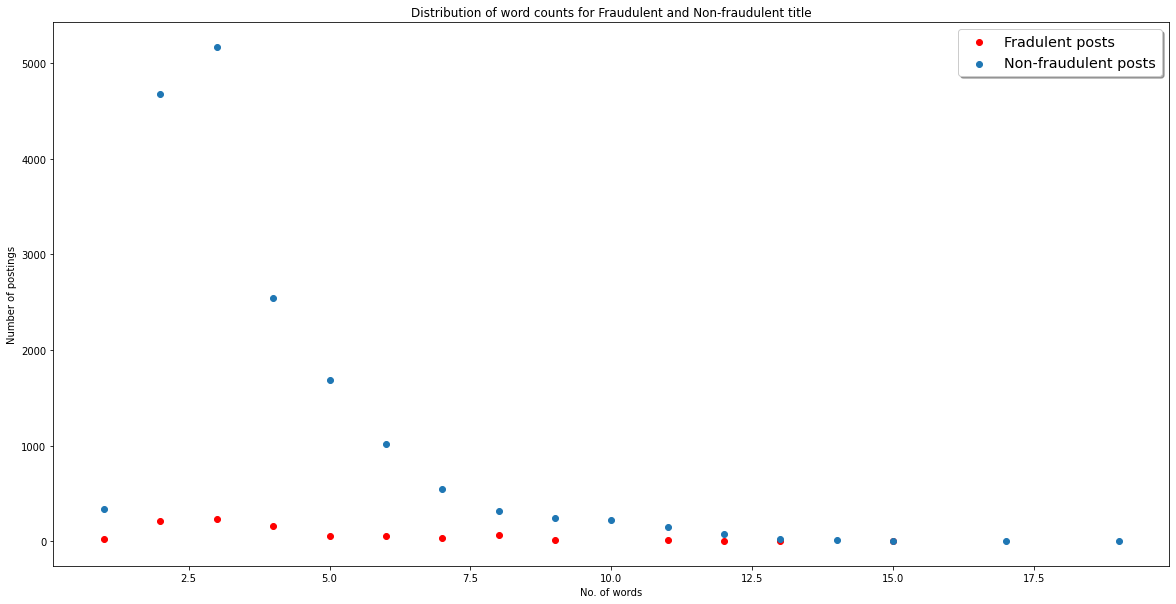

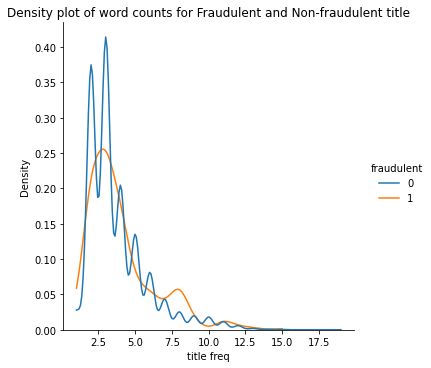

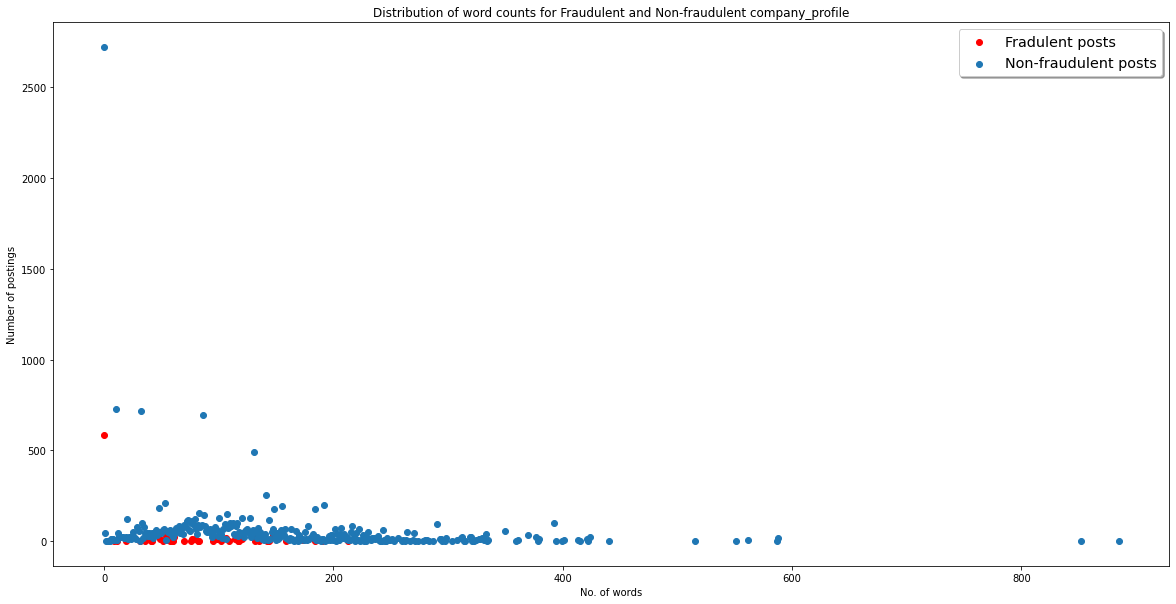

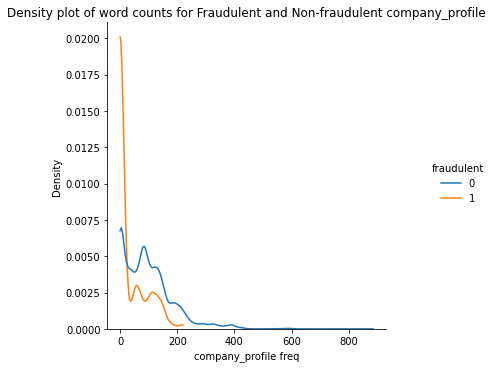

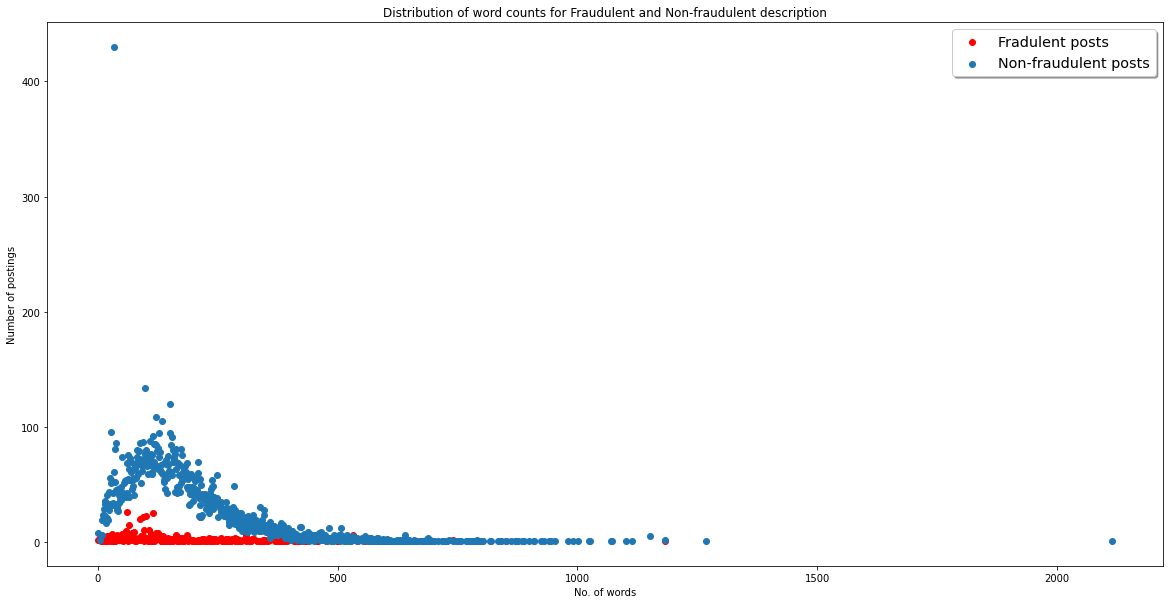

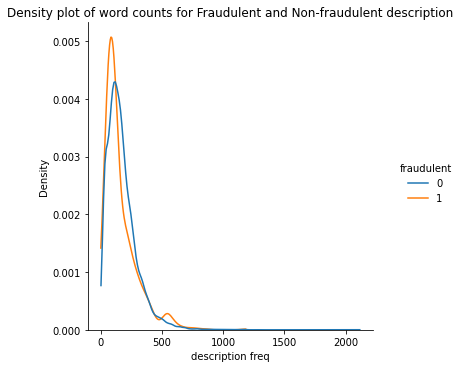

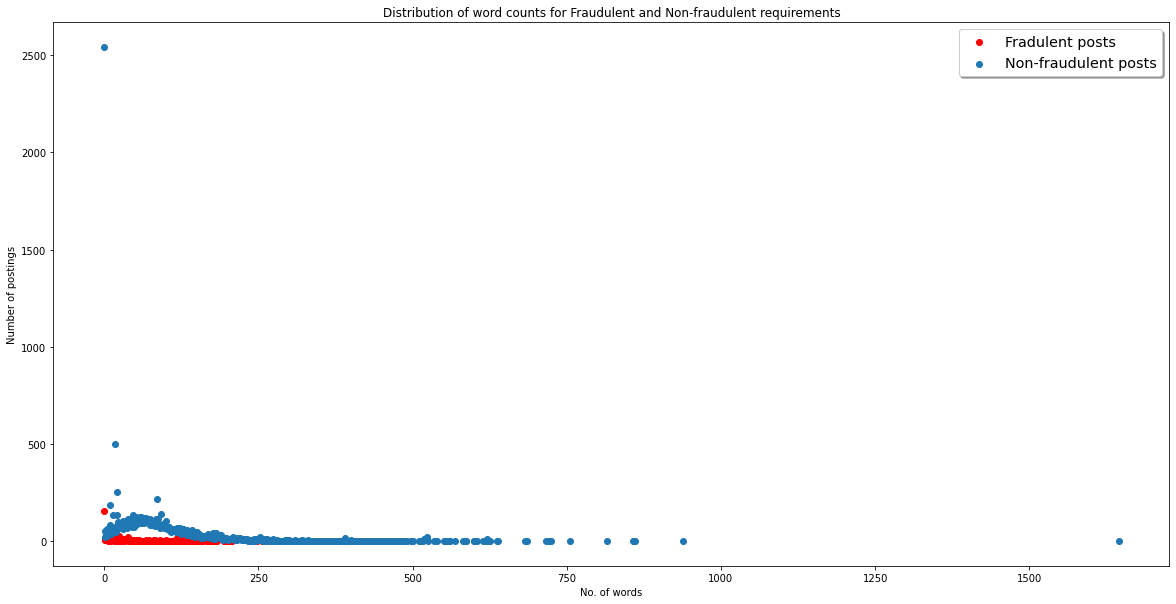

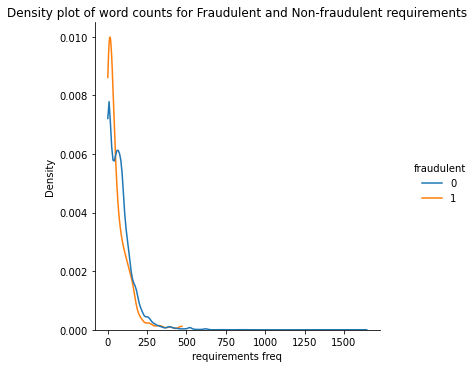

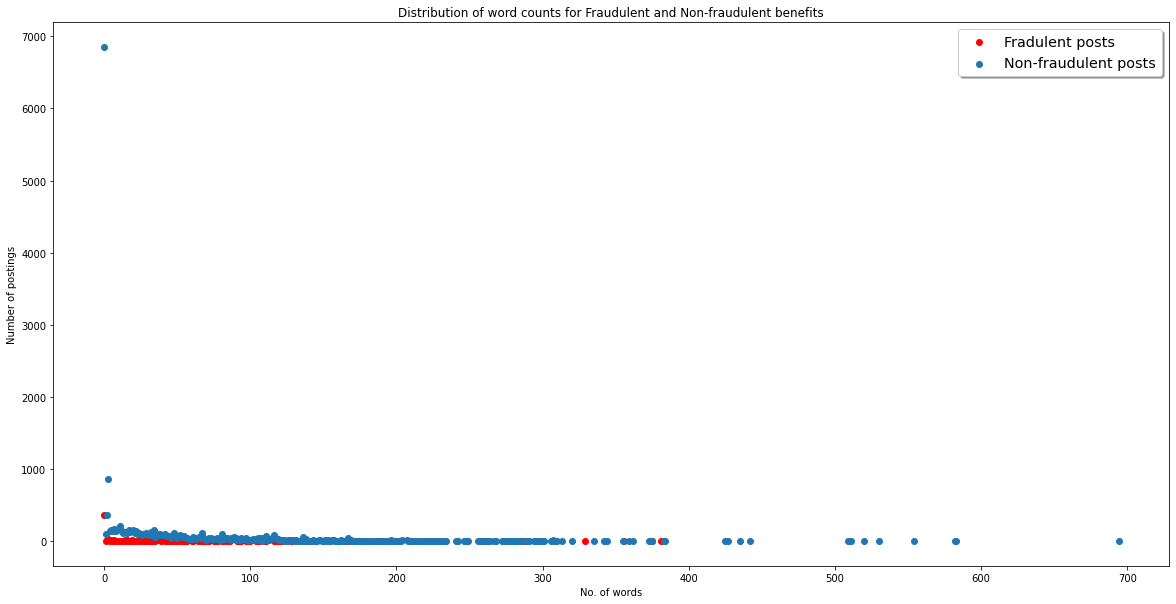

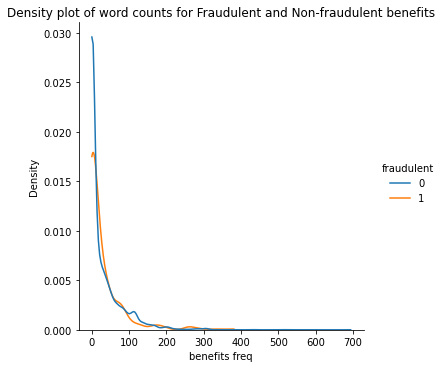

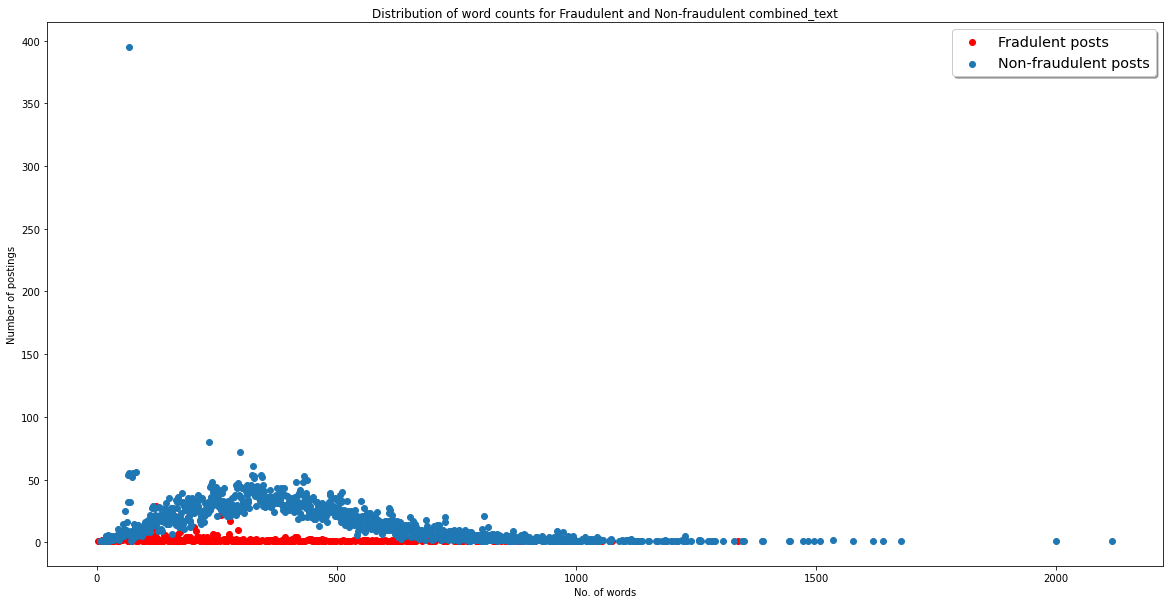

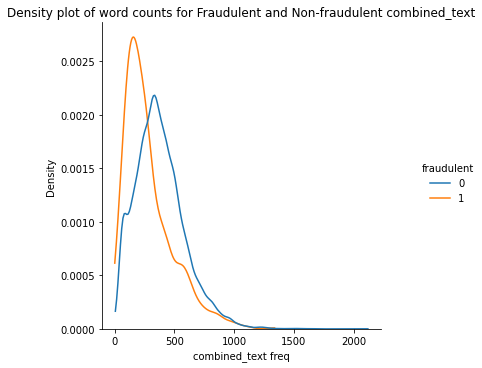

In [19]:
for column in text_features:
  create_scatter_plot(data, column)
  create_density_plot(data, column)

Description of some observations for the different text columns for the density and scatter plot

For the text column title:
From the scatterplot, we notice that the number of words for fradulent posts 
has a relatively smaller and lower range of (0, 13) compared to non-fradulent posts with a larger range of (0, 20). However, it is difficult to make a good inference based on the plot because the number of data points is too few.

Additionally, the density plot agrees with the scatterplot as both fraudulent and non-fraudulent data have similar distributions with the same mean.
Thus, we cannot draw any conclusive inferences regarding fraudulent postings from the title column.

For the company profile column title:
From the scatterplot, for fraudulent posts, the number of words generally fall in the range of (0, 200) while for the non-fraudulent posts, the number of words generally fall in the range of (0, 400) with some data points being more than 400.

From the density plot, we can see that for fradulent posts, the distribution is highly positively skewed and most of the postings have no company profile, while the non-fraudulent posts have a wider distribution and a higher mean, although it also has many postings without company profiles.

### **Special Characters in Text Fields**

The following analysis show that fraudulent and non-fraudulent postings differ in the usage of special characters/phrases in their textual attributes. For example, fraudulent postings are more likely to include **monetary value ("$ ")** in their title as compared to non-fraudulent ones (6.70% vs 0.423%).

In [20]:
fraudulent_dollar = data[data['fraudulent'] == 1].title.str.contains('$', regex=False).value_counts(normalize=True)
non_fraudulent_dollar = data[data['fraudulent'] == 0].title.str.contains('$', regex=False).value_counts(normalize=True)

df_dollar = pd.DataFrame(fraudulent_dollar)
df_dollar.rename(columns = {'title':'fraudulent'}, inplace = True)
df_dollar['non_fraudulent'] = non_fraudulent_dollar
df_dollar

,fraudulent,non_fraudulent
False,0.933025,0.995768
True,0.066975,0.004232


Fraudulent postings are also more inclined to include **emails (20.0% vs 6.82%)** and **phone numbers (9.12% vs 2.63%)** in their textual attributes.

In [21]:
fraudulent_email = data[data['fraudulent'] == 1].combined_text.str.contains('#EMAIL', regex=False).value_counts(normalize=True)
non_fraudulent_email = data[data['fraudulent'] == 0].combined_text.str.contains('#EMAIL', regex=False).value_counts(normalize=True)

df_email = pd.DataFrame(fraudulent_email)
df_email.rename(columns = {'combined_text':'fraudulent'}, inplace = True)
df_email['non_fraudulent'] = non_fraudulent_email
df_email

,fraudulent,non_fraudulent
False,0.799076,0.931762
True,0.200924,0.068238


In [22]:
fraudulent_phone = data[data['fraudulent'] == 1].combined_text.str.contains('#PHONE', regex=False).value_counts(normalize=True)
non_fraudulent_phone = data[data['fraudulent'] == 0].combined_text.str.contains('#PHONE', regex=False).value_counts(normalize=True)

df_phone = pd.DataFrame(fraudulent_phone)
df_phone.rename(columns = {'combined_text':'fraudulent'}, inplace = True)
df_phone['non_fraudulent'] = non_fraudulent_phone
df_phone

,fraudulent,non_fraudulent
False,0.908776,0.973669
True,0.091224,0.026331


However, both types of postings are equally likely in including **URLs (30.8% vs 31.4%)**.

In [23]:
fraudulent_url = data[data['fraudulent'] == 1].combined_text.str.contains('#URL', regex=False).value_counts(normalize=True)
non_fraudulent_url = data[data['fraudulent'] == 0].combined_text.str.contains('#URL', regex=False).value_counts(normalize=True)

df_url = pd.DataFrame(fraudulent_url)
df_url.rename(columns = {'combined_text':'fraudulent'}, inplace = True)
df_url['non_fraudulent'] = non_fraudulent_url
df_url

,fraudulent,non_fraudulent
False,0.691686,0.685318
True,0.308314,0.314682


# **Columns generation**

In [24]:
# add binary columns that indicates if a posting includes:

# has '$' in their title
data['has_dollar_sign'] = data['title'].apply(lambda x: 1 if str(x).find('$') != -1 else 0)

# has email in their posting
data['has_email'] = data['combined_text'].apply(lambda x: 1 if str(x).find('#EMAIL') != -1 else 0)

# has phone number in their posting
data['has_phone_number'] = data['combined_text'].apply(lambda x: 1 if str(x).find('#PHONE') != -1 else 0)

# has text in each of these columns
data['has_company_profile'] = data['company_profile'].apply(lambda x: 0 if str(x) == '' else 1)
data['has_requirements'] = data['requirements'].apply(lambda x: 0 if str(x) == '' else 1)
data['has_benefits'] = data['benefits'].apply(lambda x: 0 if str(x) == '' else 1)
data['has_employment_type'] = data['employment_type'].apply(lambda x: 0 if str(x) == '' else 1)
data['has_description'] = data['description'].apply(lambda x: 0 if str(x) == '' else 1)

In [25]:
# length of all text in a posting (title, company profile, description, requirements, and benefits)
data['combined_text_length'] = data['combined_text'].apply(lambda x: len(x.split(' ')))

data['company_profile_length'] = data['company_profile'].apply(lambda x: 0 if str(x) == '' else len(x.split(' ')))
data['requirements_length'] = data['requirements'].apply(lambda x: 0 if str(x) == '' else len(x.split(' ')))
data['benefits_length'] = data['benefits'].apply(lambda x: 0 if str(x) == '' else len(x.split(' ')))
data['description_length'] = data['description'].apply(lambda x: 0 if str(x) == '' else len(x.split(' ')))

In [26]:
# new columns for country, state and city of a job posting

# Location
location = data['location'].copy()
location_splitted = list(location.str.split(', ').values)
for loc_ind, loc in enumerate(location_splitted):
    if loc is np.nan:
        location_splitted[loc_ind] = ['Unspecified'] * 3
    else:
        for el_ind, el in enumerate(loc):
            if el == '':
                loc[el_ind] = 'Unspecified'

location_splitted[:15]

[['US', 'NY', 'New York'],
 ['NZ', 'Unspecified', 'Auckland'],
 ['US', 'IA', 'Wever'],
 ['US', 'DC', 'Washington'],
 ['US', 'FL', 'Fort Worth'],
 ['US', 'MD', 'Unspecified'],
 ['DE', 'BE', 'Berlin'],
 ['US', 'CA', 'San Francisco'],
 ['US', 'FL', 'Pensacola'],
 ['US', 'AZ', 'Phoenix'],
 ['US', 'NJ', 'Jersey City'],
 ['GB', 'LND', 'London'],
 ['US', 'CT', 'Stamford'],
 ['US', 'FL', 'Orlando'],
 ['AU', 'NSW', 'Sydney']]

In [27]:
location_splitted = list(map(lambda loc: list(loc), location_splitted))

for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        location_splitted[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted[loc_ind] += ['Unspecified'] * 2

data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
data_location.head(15)

,country,state,city
0,US,NY,New York
1,NZ,Unspecified,Auckland
2,US,IA,Wever
3,US,DC,Washington
4,US,FL,Fort Worth
5,US,MD,Unspecified
6,DE,BE,Berlin
7,US,CA,San Francisco
8,US,FL,Pensacola
9,US,AZ,Phoenix


In [28]:
cat_features += ['country', 'state', 'city']
data = pd.concat([data, data_location], axis=1)
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_employment_type,has_description,combined_text_length,company_profile_length,requirements_length,benefits_length,description_length,country,state,city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,...,1,1,384,141,115,0,124,US,NY,New York
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,1,1,878,150,187,225,309,NZ,Unspecified,Auckland
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,...,0,1,356,136,164,0,50,US,IA,Wever
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,1,1,706,85,174,96,345,US,DC,Washington
4,5,Bill Review Manager,"US, FL, Fort Worth",,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,1,483,205,89,3,182,US,FL,Fort Worth


In [29]:
salary_range = data.salary_range.copy()

# Fill missing values with 0-0 value and splitting them

salary_range.fillna('0-0', inplace=True)
salary_range_sep = list(salary_range.str.split('-').values)
salary_range_sep[:5]

[['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0']]

In [30]:
# Check for unusual values

for range_ind, s_range in enumerate(salary_range_sep):
    if len(s_range) < 2 or len(s_range) > 2:
        print(range_ind, s_range)

5538 ['40000']


In [31]:
# Fixing the unusual values

salary_range_sep[5538] = ['40000', '40000']

In [32]:
# Detecting erroneous salary range that inputted some kind of dates

error_range_inds = []
for range_ind, s_range in enumerate(salary_range_sep):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        print(range_ind, (min_value, max_value))
        error_range_inds += [range_ind]

# Replacing these date values with the salary range of 0,0

for range_ind in error_range_inds:
    salary_range_sep[range_ind] = ['0', '0']

159 ('9', 'Dec')
1884 ('3', 'Apr')
1981 ('4', 'Apr')
2313 ('Oct', '15')
4299 ('8', 'Sep')
9124 ('4', 'Jun')
9902 ('10', 'Oct')
9911 ('Oct', '20')
10316 ('Jun', '18')
10785 ('10', 'Oct')
10788 ('11', 'Nov')
10860 ('10', 'Nov')
10883 ('10', 'Oct')
10889 ('10', 'Nov')
10896 ('10', 'Oct')
10905 ('10', 'Nov')
11361 ('11', 'Dec')
11495 ('2', 'Apr')
11606 ('10', 'Nov')
12421 ('10', 'Oct')
13449 ('11', 'Nov')
13482 ('2', 'Jun')
14196 ('Oct', '20')
15483 ('10', 'Oct')
17233 ('10', 'Nov')
17656 ('Dec', '25')


In [33]:
# Save it as a dataframe

data_salary_range = pd.DataFrame(np.array(salary_range_sep, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])
data_salary_range.head(10)

,min_salary,max_salary
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,20000,28000
7,0,0
8,0,0
9,0,0


In [34]:
# Add a salary_specified column

data_salary_range['salary_specified'] = ((data_salary_range.min_salary != 0) | 
                                         (data_salary_range.max_salary != 0)).astype('int64')
data_salary_range.head(10)

,min_salary,max_salary,salary_specified
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,20000,28000,1
7,0,0,0
8,0,0,0
9,0,0,0


In [35]:
data = pd.concat([data, data_salary_range], axis=1)

In [36]:
# Old salary_range column not needed anymore

data.drop('salary_range', axis=1, inplace=True)

In [37]:
# drop columns that are unnecessary (eg. job_id) or have been extracted to other columns (eg. location)
data.drop(['job_id', 'location'], axis=1, inplace = True)
data.drop(['num_word_tit', 'num_word_com', 'num_word_des', 'num_word_req', 'num_word_ben'], axis=1, inplace = True)

## **Checking for Correlation**

This is done to ensure that newly created features are not highly correlated to each other or the original features (prevent multicolinearity)

In [38]:
# check for correlation among original and newly created features
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,telecommuting,has_company_logo,has_questions,fraudulent,has_dollar_sign,has_email,has_phone_number,has_company_profile,has_requirements,has_benefits,has_employment_type,has_description,combined_text_length,company_profile_length,requirements_length,benefits_length,description_length,min_salary,max_salary,salary_specified
telecommuting,1.00,-0.02,0.02,0.03,-0.01,-0.03,-0.02,-0.07,0.04,0.05,0.01,0.00,0.00,-0.02,0.02,0.00,0.01,-0.00,-0.00,0.06
has_company_logo,-0.02,1.00,0.23,-0.26,-0.05,-0.00,-0.00,0.69,0.26,0.19,0.06,0.01,0.27,0.46,0.11,0.15,0.03,0.00,0.00,-0.06
has_questions,0.02,0.23,1.00,-0.09,-0.04,-0.04,0.02,0.15,0.22,0.28,0.01,0.01,0.10,0.13,0.05,0.10,0.01,-0.01,-0.01,0.01
fraudulent,0.03,-0.26,-0.09,1.00,0.16,0.11,0.08,-0.29,-0.02,-0.01,-0.05,-0.03,-0.10,-0.16,-0.05,0.00,-0.02,-0.00,-0.00,0.06
has_dollar_sign,-0.01,-0.05,-0.04,0.16,1.00,0.04,-0.00,-0.06,0.02,0.04,-0.02,0.00,-0.03,-0.03,-0.02,0.01,-0.03,-0.00,-0.00,0.01
has_email,-0.03,-0.00,-0.04,0.11,0.04,1.00,0.43,-0.03,0.01,0.08,-0.05,0.00,0.04,0.01,-0.01,0.11,0.02,-0.00,-0.00,-0.03
has_phone_number,-0.02,-0.00,0.02,0.08,-0.00,0.43,1.00,-0.02,0.02,0.07,0.02,0.00,0.08,0.03,0.00,0.08,0.09,-0.00,-0.00,0.01
has_company_profile,-0.07,0.69,0.15,-0.29,-0.06,-0.03,-0.02,1.00,0.10,0.10,0.11,0.02,0.27,0.52,0.08,0.09,0.02,0.00,0.00,-0.08
has_requirements,0.04,0.26,0.22,-0.02,0.02,0.01,0.02,0.10,1.00,0.43,0.17,0.02,0.19,0.12,0.39,0.22,-0.10,0.00,0.00,0.07
has_benefits,0.05,0.19,0.28,-0.01,0.04,0.08,0.07,0.10,0.43,1.00,0.14,0.01,0.14,0.08,0.07,0.49,-0.05,0.01,0.01,0.13


# **Text Pre-processing**

We need to first clean the textual data by removing punctuations and stop-words and then apply lemmatizing. 


In [39]:
# define lemmatize functions

stop = set(stopwords.words('english'))
stop.update(['and', 'to', 'the', 'of', 'a', 'in', 'with', 'for', 'our', 'is', 'we', 'you', 'are', 'as', 'be', 'on', 'that', 'or'])
punctuation = list(string.punctuation)
stop.update(punctuation)

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [40]:
def remove_punctuations(text):
    b = re.sub(r'[^\w]', ' ', text)
    return b

In [41]:
%%time
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']

for feature_name in text_features:
    # change all text to lowercase
    data[feature_name] = data[feature_name].str.lower()

    # expand contractions (eg. "We're" to "We are")
    data[feature_name] = data[feature_name].apply(lambda x: contractions.fix(x))
    
    # remove punctuations
    data[feature_name] = data[feature_name].apply(remove_punctuations)

    # remove whitespace
    data[feature_name] = data[feature_name].apply(lambda x: ' '.join([word for word in x.split()]))
    
    # removing stop-words and lemmatize
    data[feature_name] = data[feature_name].progress_apply(lemmatize_words)   

data[text_features].head()

  0%|          | 0/17880 [00:00<?, ?it/s]

  0%|          | 0/17880 [00:00<?, ?it/s]

  0%|          | 0/17880 [00:00<?, ?it/s]

  0%|          | 0/17880 [00:00<?, ?it/s]

  0%|          | 0/17880 [00:00<?, ?it/s]

CPU times: user 11min 52s, sys: 41.5 s, total: 12min 33s
Wall time: 13min 1s


,title,company_profile,description,requirements,benefits
0,marketing intern,food52 create groundbreaking award win cooking...,food52 fast grow james beard award win online ...,experience content management system major plu...,
1,customer service cloud video production,90 second world cloud video production service...,organise focus vibrant awesome passion custome...,expect key responsibility communicate client 9...,get usthrough part 90 second team gain experie...
2,commission machinery assistant cma,valor service provide workforce solution meet ...,client locate houston actively seek experience...,implement pre commission commission procedure ...,
3,account executive washington dc,passion improve quality life geography heart e...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...
4,bill review manager,spotsource solution llc global human capital m...,job title itemization review managerlocation f...,qualification right license state texasdiploma...,full benefit offer


In [42]:
data['combined_text'].iloc[0]

" Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and c

## **Find the top 20 most common words among fraudulent and  non-fraudulent data.**

In [43]:
combined_text_all = ' '.join(data["combined_text"])

split_it = combined_text_all.split()
Counter_obj = Counter(split_it)
most_occur = Counter_obj.most_common(20)

In [44]:
most_occur

[('and', 358357),
 ('to', 202836),
 ('the', 183904),
 ('of', 152763),
 ('a', 139596),
 ('in', 122771),
 ('with', 89156),
 ('for', 81535),
 ('is', 63550),
 ('our', 53853),
 ('are', 44310),
 ('be', 37274),
 ('on', 36951),
 ('you', 36213),
 ('as', 35896),
 ('that', 33213),
 ('will', 32743),
 ('or', 32469),
 ('work', 30439),
 ('an', 30381)]

# **Data Export**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   17880 non-null  object
 1   department              17880 non-null  object
 2   company_profile         17880 non-null  object
 3   description             17880 non-null  object
 4   requirements            17880 non-null  object
 5   benefits                17880 non-null  object
 6   telecommuting           17880 non-null  int64 
 7   has_company_logo        17880 non-null  int64 
 8   has_questions           17880 non-null  int64 
 9   employment_type         17880 non-null  object
 10  required_experience     17880 non-null  object
 11  required_education      17880 non-null  object
 12  industry                17880 non-null  object
 13  function                17880 non-null  object
 14  fraudulent              17880 non-null  int64 
 15  co

In [51]:
data.duplicated().sum()

281

In [54]:
data = data.drop_duplicates()

In [55]:
data.duplicated().sum()

0

In [56]:
# run this chunk to get csv with the new features
data.to_csv('data_39.csv', index=False)